# King County House Sales Analysis


## Overview

King County is located in the U.S. state of Washington. It is the most populous county in Washington, and the 13th-most populous in the United States. The county seat is Seattle, also the state's most populous city.

## Business Understanding

A real estate agent of a company in Seattle(stakeholder) wants to know which factors significantly impact the prices of a house in King County. This will aid in strategizing on the best criteria to take in order to maximize on profit. I have been given the task by the company to come up with a model that will be used to predict property prices in King County and obtain significant recommendations on steps that they should take for the business to be successful.

## Objectives
* Build a linear regression model to predict house prices in King County.
* To identify factors affectng prices of houses in King County.
* To determine what time of the year were most houses built.
* To determine which year were most houses built
* to determine which year were most houses sold

## Data Understanding

## Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [68]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm


ModuleNotFoundError: No module named 'sklearn'

In [2]:
# importing the data
df = pd.read_csv("C:/Users/Rfwel/Desktop/Moringa Course Materials/Phase 2/King-County-House-Sales-Analysis/data/kc_house_data.csv", index_col=0)
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# summary statistics of the data
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# checking on dataframe columns
df.columns.tolist()

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [5]:
#number rows and columns in the data
df.shape

(21597, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [7]:
#checking for null values in the dataframe
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# checking for duplicates
df.duplicated().sum()

0

In [9]:
# total number of houses without basement

(df.sqft_basement == '0.0').sum()

12826

In [10]:
#number of houses with unique floor values
df['floors'].value_counts().to_frame()

,floors
1.0,10673
2.0,8235
1.5,1910
3.0,611
2.5,161
3.5,7


In [11]:
# Total number of houses on a waterfront 

(df.waterfront == 'YES').sum()

146

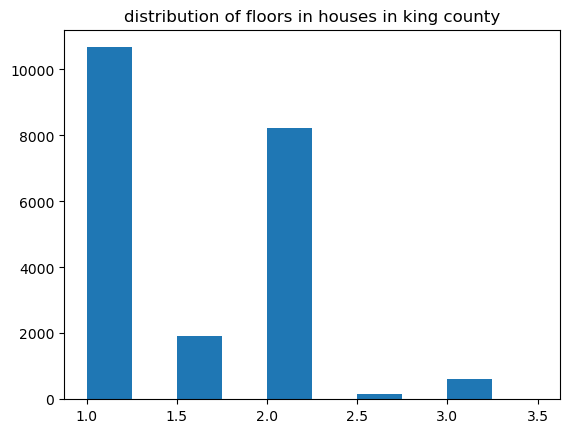

In [12]:
#distribution of number of floors in a house in the data

plt.hist(x = df['floors'])
plt.title("distribution of floors in houses in king county")
plt.show()

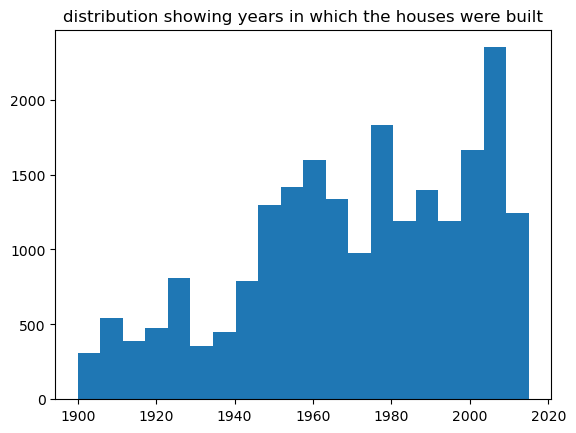

In [13]:
#distribution and trend in years in which king county houses were built according to the data

plt.hist(x = df['yr_built'], bins = 20)
plt.title("distribution showing years in which the houses were built")
plt.show()

# Data Preparation

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [15]:
# changing date data type to date time
df['date']=pd.to_datetime(df['date'])

In [16]:
# checking for outliers using box plot
def plot_boxplot(x, data):

    # Create the box plot
    sns.boxplot(x=x, data=df)

    # Add labels and title
    plt.xlabel(f"{x}")
    plt.ylabel('Values')
    plt.title(f"Box Plot for {x}")
    # Display the plot
    plt.show()

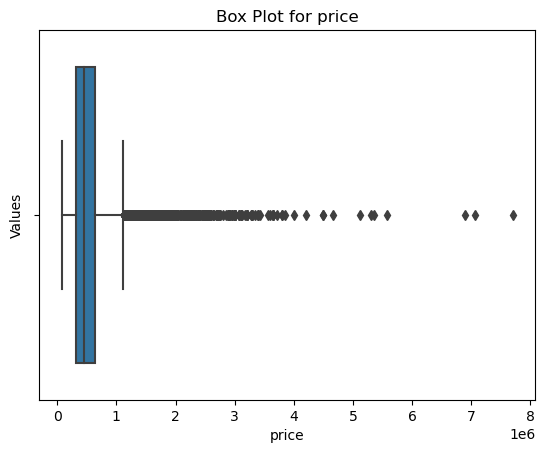

In [17]:
# Distribution plot for price
plot_boxplot('price', df)

In [18]:
# Remove price outliers

# Reset the index
df.reset_index(drop=True, inplace=True)

# Remove price outliers
df['price'] = df['price'][(np.abs(stats.zscore(df['price'])) < 3)]
df['price']


0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

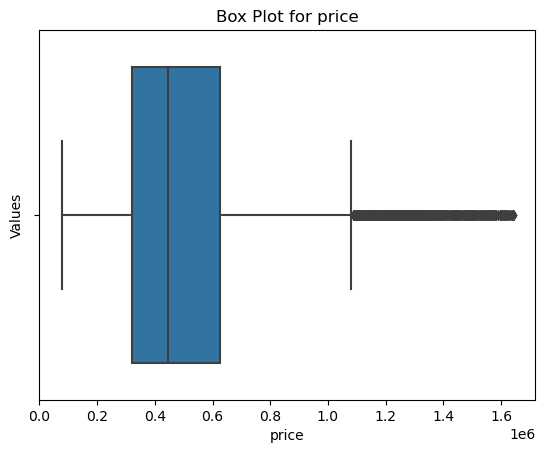

In [19]:
# Distribution plot for price
plot_boxplot('price', df)

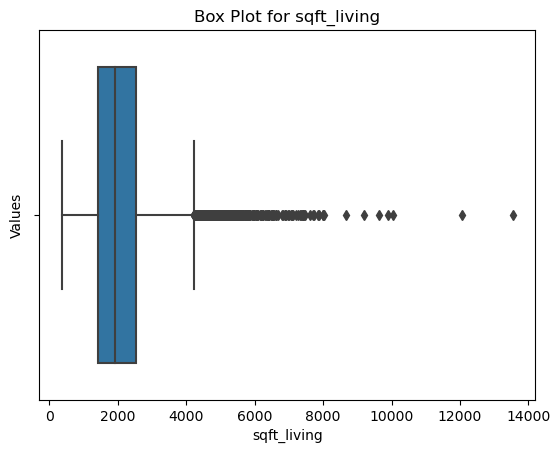

In [20]:
# Distribution plot for price
plot_boxplot('sqft_living', df)

In [21]:
# Remove price outliers
df['sqft_living'] = df['sqft_living'][(np.abs(stats.zscore(df['sqft_living'])) < 3)]
df['sqft_living']


0        1180.0
1        2570.0
2         770.0
3        1960.0
4        1680.0
          ...  
21592    1530.0
21593    2310.0
21594    1020.0
21595    1600.0
21596    1020.0
Name: sqft_living, Length: 21597, dtype: float64

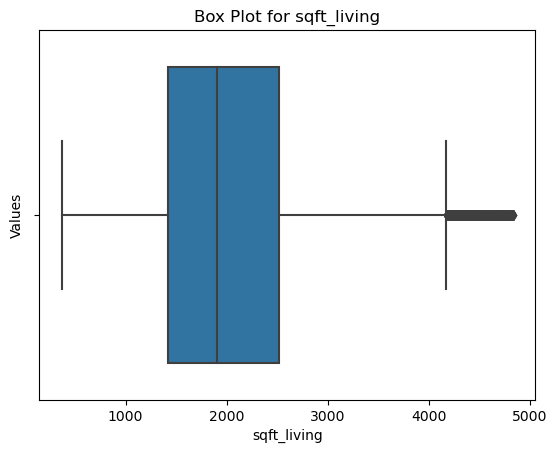

In [22]:
plot_boxplot('sqft_living', df)

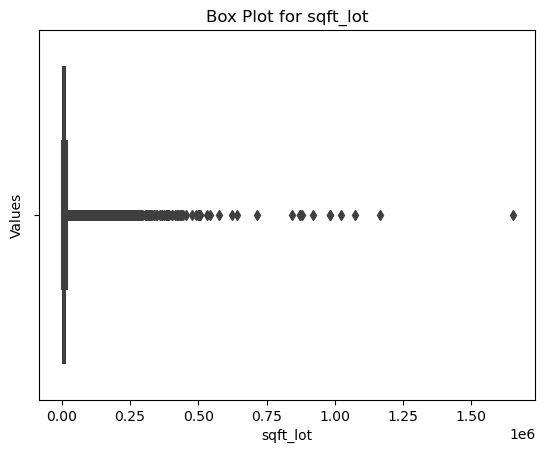

In [23]:
# Distribution plot for sqft_lot
plot_boxplot('sqft_lot', df)

In [24]:
# Remove price outliers
df['sqft_lot'] = df['sqft_lot'][(np.abs(stats.zscore(df['sqft_lot'])) < 3)]
df['sqft_lot']

0         5650.0
1         7242.0
2        10000.0
3         5000.0
4         8080.0
          ...   
21592     1131.0
21593     5813.0
21594     1350.0
21595     2388.0
21596     1076.0
Name: sqft_lot, Length: 21597, dtype: float64

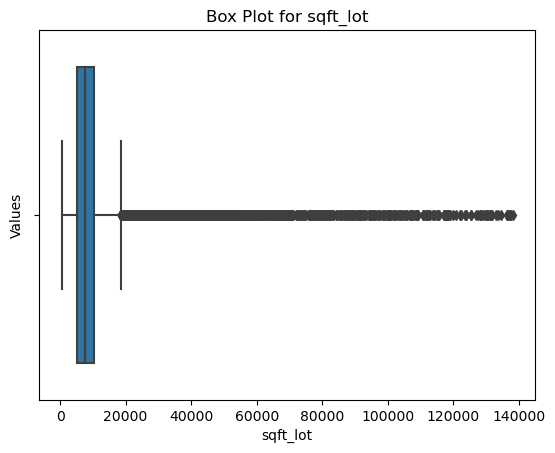

In [25]:
plot_boxplot('sqft_lot', df)

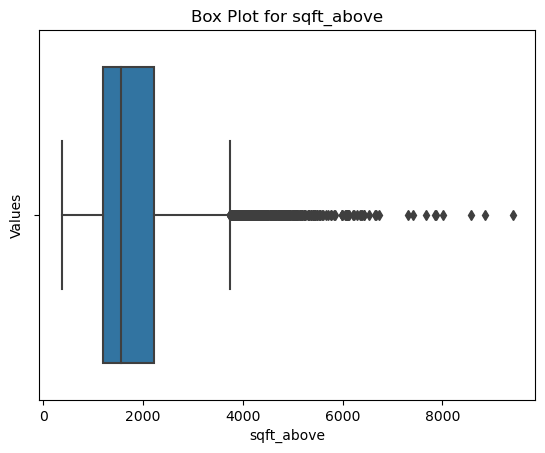

In [26]:
# Distribution plot for sqft_above 
plot_boxplot('sqft_above', df)

In [27]:
# Remove price outliers
df['sqft_above'] = df['sqft_above'][(np.abs(stats.zscore(df['sqft_above'])) < 3)]
df['sqft_above']

0        1180.0
1        2170.0
2         770.0
3        1050.0
4        1680.0
          ...  
21592    1530.0
21593    2310.0
21594    1020.0
21595    1600.0
21596    1020.0
Name: sqft_above, Length: 21597, dtype: float64

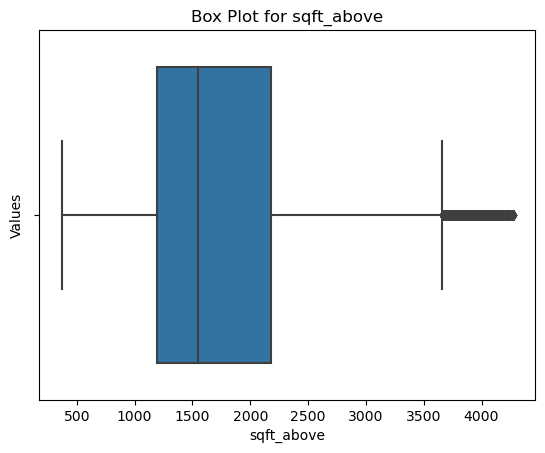

In [28]:
plot_boxplot('sqft_above', df)

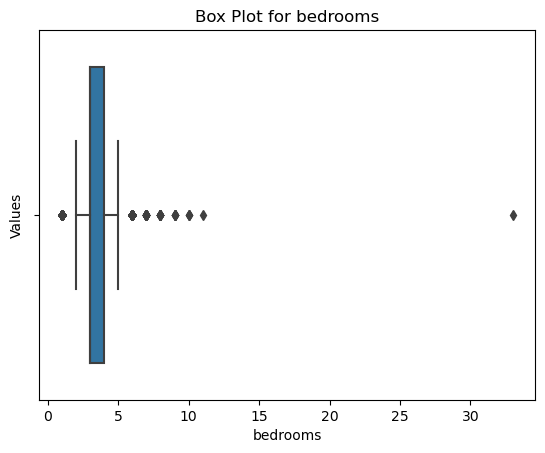

In [29]:
plot_boxplot('bedrooms', df)

In [30]:
df['bedrooms'] = df['bedrooms'][(np.abs(stats.zscore(df['bedrooms'])) < 3)]
df['bedrooms']

0        3.0
1        3.0
2        2.0
3        4.0
4        3.0
        ... 
21592    3.0
21593    4.0
21594    2.0
21595    3.0
21596    2.0
Name: bedrooms, Length: 21597, dtype: float64

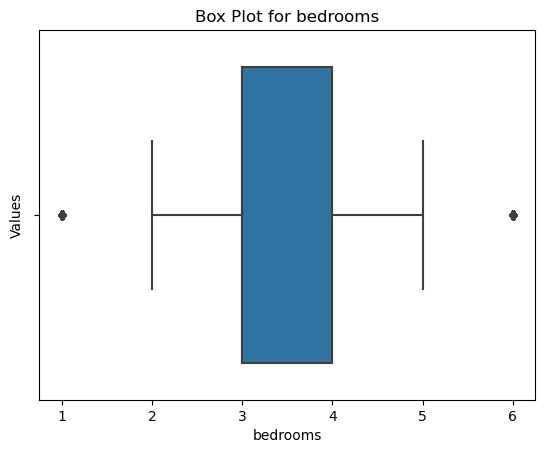

In [31]:
plot_boxplot('bedrooms', df)

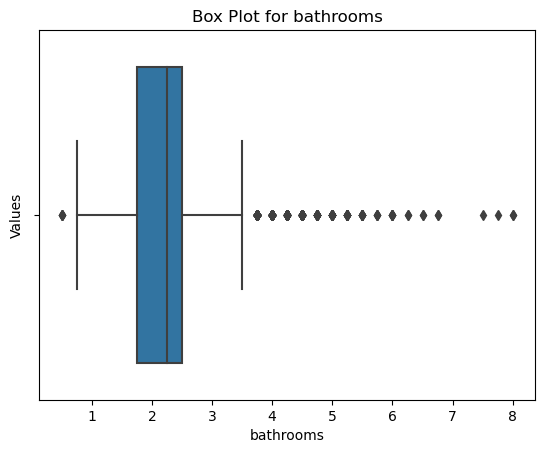

In [32]:
plot_boxplot('bathrooms', df)

In [33]:
df['bathrooms'] = df['bathrooms'][(np.abs(stats.zscore(df['bathrooms'])) < 3)]
df['bathrooms']

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21592    2.50
21593    2.50
21594    0.75
21595    2.50
21596    0.75
Name: bathrooms, Length: 21597, dtype: float64

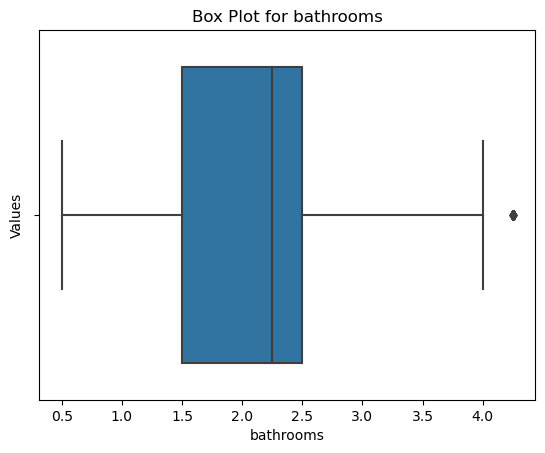

In [34]:
plot_boxplot('bathrooms', df)

In [35]:
# dealing with missing values

df['waterfront'].fillna("NO", inplace=True)
df['waterfront'].isna().sum()

0

Missing values in waterfront is replaced with NO to imply that the house is not on a water front.\

In [36]:
df['view'].fillna("NONE", inplace=True)
df['view'].isna().sum()

0

In [37]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [38]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [39]:
df['yr_renovated'].fillna("0.0", inplace=True)
df['yr_renovated'].isna().sum()

0

Replacing missing values in yr_renovated with 0 to imply that these houses are not renovated.

In [40]:
df.dropna(inplace=True)

In [41]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Exploratory Data Analysis

## 1. Univariate Analysis

In [42]:
# split date into day, month,year
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [43]:
def bar_plot(x, data):
    
    plt.figure(figsize=(10,6))

    sns.countplot(x=x, data=data)
    plt.xlabel(f'{x}')
    plt.ylabel('Count')
    plt.show()

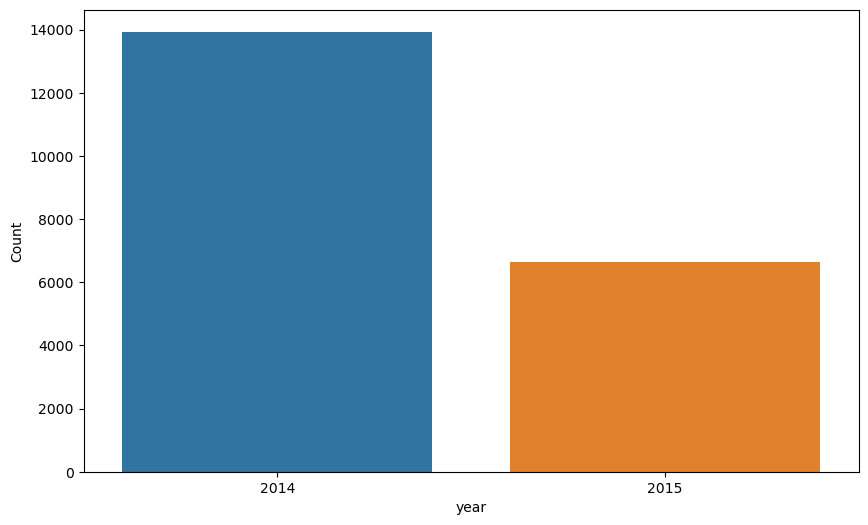

In [44]:
bar_plot('year', data=df)

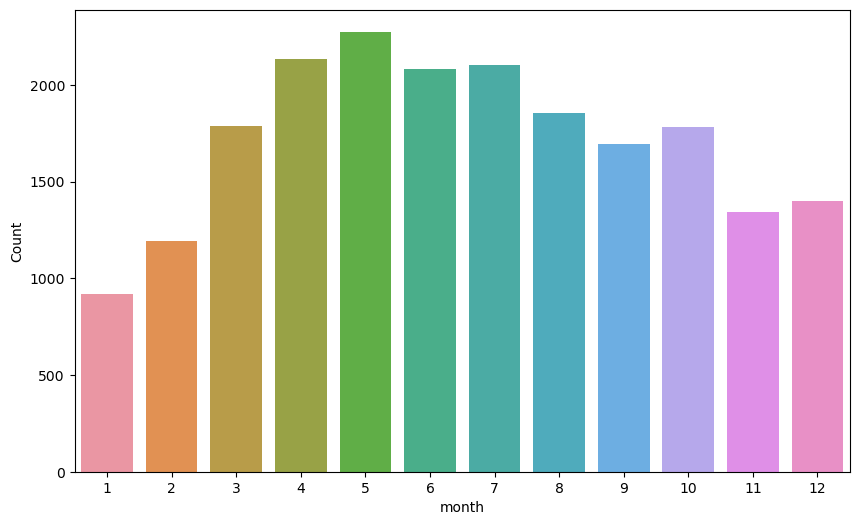

In [45]:
bar_plot('month', data=df)

In [46]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'day', 'month', 'year'],
      dtype='object')

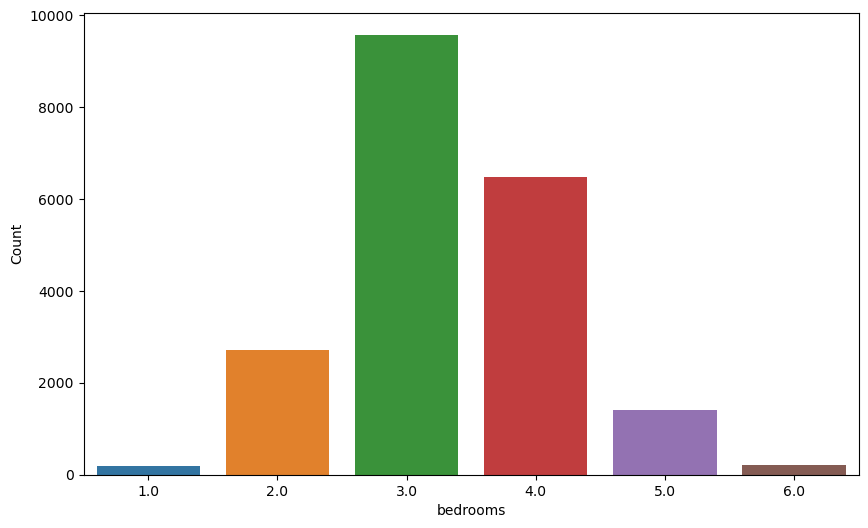

In [47]:
bar_plot('bedrooms', data=df)

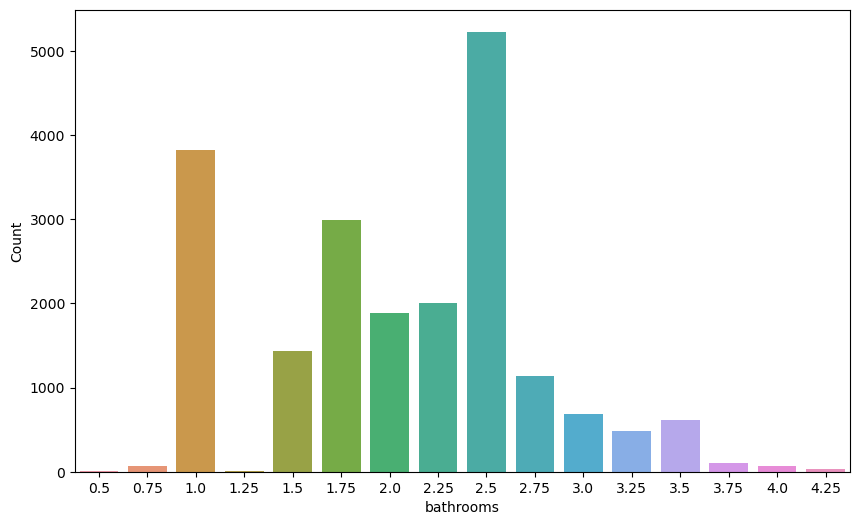

In [48]:
bar_plot('bathrooms', data=df)

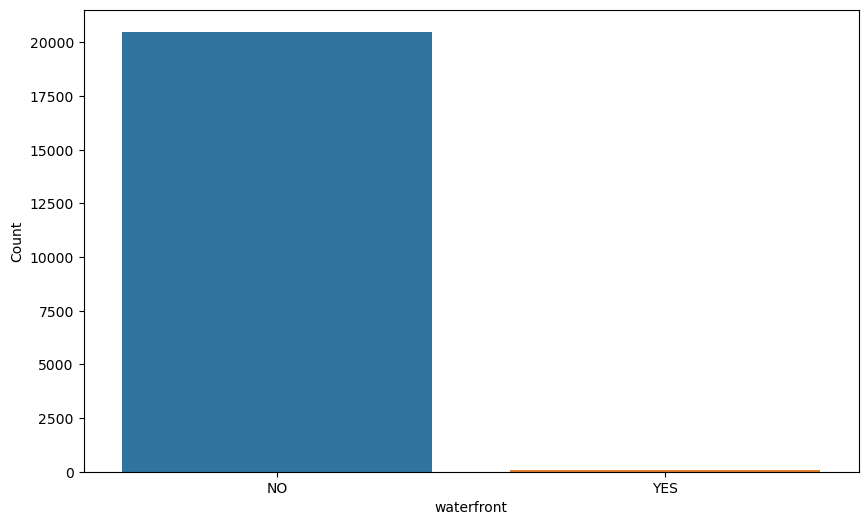

In [49]:
bar_plot('waterfront', data=df)

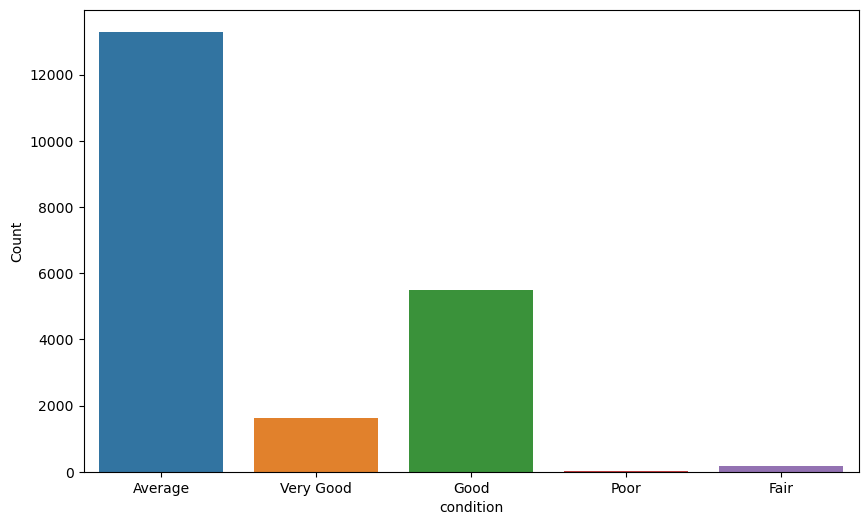

In [50]:
bar_plot('condition', data=df)

## 2. Bivariate Analysis

Price - target variable

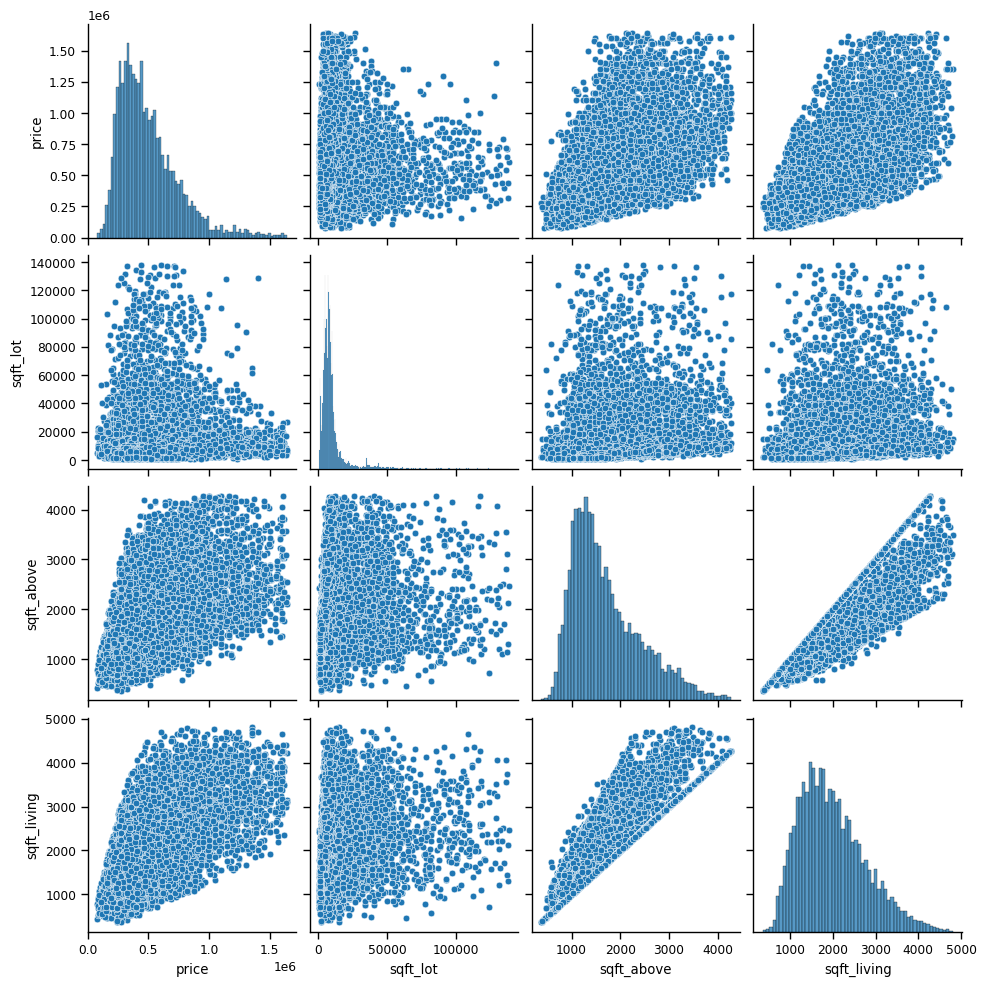

In [51]:
sns.set_context("paper", font_scale= 1)

continuous_data = df.loc[:,["price", "sqft_lot", "sqft_above", "sqft_living"]]
                              
n = sns.pairplot(continuous_data)

In [52]:
#finding out the correlation between the features and our target variable price
df.corr()['price'].drop('price')

C:\Users\Rfwel\AppData\Local\Temp\ipykernel_26520\765275259.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].drop('price')


bedrooms         0.305556
bathrooms        0.465018
sqft_living      0.639111
sqft_lot         0.087712
floors           0.261900
sqft_above       0.527829
yr_built         0.035992
zipcode         -0.019352
lat              0.403328
long             0.020092
sqft_living15    0.571456
sqft_lot15       0.047540
day             -0.010617
month           -0.012086
year             0.003796
Name: price, dtype: float64

# Modeling

In [53]:
data = pd.DataFrame(df, columns=['price', 'sqft_living15', 'sqft_living', 'bedrooms', 'bathrooms', 'sqft_above', 'grade'])

In [54]:
data.head()

,price,sqft_living15,sqft_living,bedrooms,bathrooms,sqft_above,grade
0,221900.0,1340,1180.0,3.0,1.00,1180.0,7 Average
1,538000.0,1690,2570.0,3.0,2.25,2170.0,7 Average
2,180000.0,2720,770.0,2.0,1.00,770.0,6 Low Average
3,604000.0,1360,1960.0,4.0,3.00,1050.0,7 Average
4,510000.0,1800,1680.0,3.0,2.00,1680.0,8 Good


### 1.Linear Regression(Base Model)

Base Model- refers to a simple or initial model that serves as a starting point for more complex or advanced modeling techniques. It provides a baseline or reference performance that can be used for comparison with more sophisticated models.

y - target variable (price)
X - dependent variables 

In [55]:
# define dependent and independent variable

X = data[['sqft_living']]
y = data['price']

In [56]:
# create a model

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                 1.421e+04
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:42:56   Log-Likelihood:            -2.7955e+05
No. Observations:               20576   AIC:                         5.591e+05
Df Residuals:                   20574   BIC:                         5.591e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.576e+04   3710.257     23.114      

* R-squared = 0.408, This indicates 40% variation in price can be explained by the sqft_living of the house.

* p_value = 0.000, which is less than 0.05. We therefore reject the null hypothesis that sqft_living and price are not linearly related.

* **linear model -** price = 207.4580 sqft_living + 8.576e+04



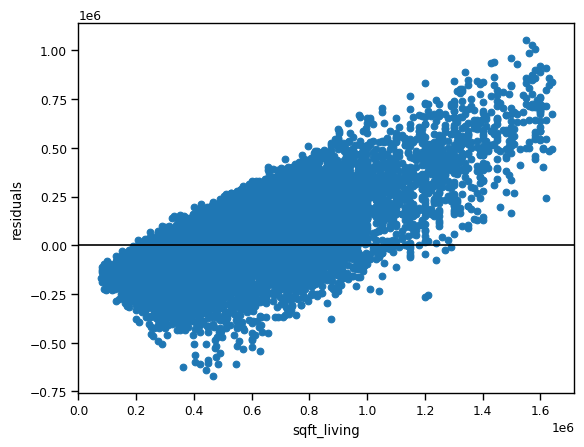

In [69]:
#residuals:

fig, ax = plt.subplots()

ax.scatter(df["price"], results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

### 2. multiple linear regression

In [58]:
X = data[['sqft_living', 'sqft_living15', 'sqft_above']]
y = data['price']

In [59]:
# create a model

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     5216.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:43:00   Log-Likelihood:            -2.7913e+05
No. Observations:               20576   AIC:                         5.583e+05
Df Residuals:                   20572   BIC:                         5.583e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.373e+04   4298.631      5.521

The model explains 43.2% variation in price.

All of the p-values round to 0

when all predictors are 0, the price value would be about 2.373e+04

with each increase in 1 sqft_living, we see an associated price increase of 2.373e+04 and with each inctrease in 1 sqft_above, we see an associated price decrease of -40.8154 

for the company to maximize on profit, the houses should have a high sqft_living and sqft_living15. Related to the construction and design of the house.

In [60]:
y = df["price"]
X = df[['sqft_living', 'sqft_living15', 'sqft_above', 'bedrooms']]
X = pd.get_dummies(X, columns=['bedrooms'], drop_first=True) 

X

,sqft_living,sqft_living15,sqft_above,bedrooms_2.0,bedrooms_3.0,bedrooms_4.0,bedrooms_5.0,bedrooms_6.0
0,1180.0,1340,1180.0,0,1,0,0,0
1,2570.0,1690,2170.0,0,1,0,0,0
2,770.0,2720,770.0,1,0,0,0,0
3,1960.0,1360,1050.0,0,0,1,0,0
4,1680.0,1800,1680.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
21592,1530.0,1530,1530.0,0,1,0,0,0
21593,2310.0,1830,2310.0,0,0,1,0,0
21594,1020.0,1020,1020.0,1,0,0,0,0
21595,1600.0,1410,1600.0,0,1,0,0,0


In [61]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     2047.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:43:00   Log-Likelihood:            -2.7893e+05
No. Observations:               20576   AIC:                         5.579e+05
Df Residuals:                   20567   BIC:                         5.579e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.827e+04   1.39e+04      2.756

In [62]:
y = df["price"]
X = df[['sqft_living', 'sqft_living15', 'sqft_above', 'bedrooms', 'bathrooms']]
X = pd.get_dummies(X, columns=['bathrooms'], drop_first=True) 

X

,sqft_living,sqft_living15,sqft_above,bedrooms,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25
0,1180.0,1340,1180.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2570.0,1690,2170.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,770.0,2720,770.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1960.0,1360,1050.0,4.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1680.0,1800,1680.0,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530.0,1530,1530.0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21593,2310.0,1830,2310.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21594,1020.0,1020,1020.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21595,1600.0,1410,1600.0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [63]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     911.5
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:43:01   Log-Likelihood:            -2.7867e+05
No. Observations:               20576   AIC:                         5.574e+05
Df Residuals:                   20556   BIC:                         5.575e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.714e+04   9.23e+04     -0.

In [64]:
y = df["price"]
X = df[['sqft_living', 'sqft_living15', 'sqft_above', 'bedrooms', 'bathrooms', 'grade']]
X = pd.get_dummies(X, columns=['grade'], drop_first=True) 

X

,sqft_living,sqft_living15,sqft_above,bedrooms,bathrooms,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1180.0,1340,1180.0,3.0,1.00,0,0,0,0,0,0,1,0,0
1,2570.0,1690,2170.0,3.0,2.25,0,0,0,0,0,0,1,0,0
2,770.0,2720,770.0,2.0,1.00,0,0,0,0,0,1,0,0,0
3,1960.0,1360,1050.0,4.0,3.00,0,0,0,0,0,0,1,0,0
4,1680.0,1800,1680.0,3.0,2.00,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530.0,1530,1530.0,3.0,2.50,0,0,0,0,0,0,0,1,0
21593,2310.0,1830,2310.0,4.0,2.50,0,0,0,0,0,0,0,1,0
21594,1020.0,1020,1020.0,2.0,0.75,0,0,0,0,0,0,1,0,0
21595,1600.0,1410,1600.0,3.0,2.50,0,0,0,0,0,0,0,1,0


In [65]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     1551.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:43:01   Log-Likelihood:            -2.7754e+05
No. Observations:               20576   AIC:                         5.551e+05
Df Residuals:                   20561   BIC:                         5.552e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.961e+05   1

# Regression Results

## 1 Price and sqft_living

R-squared: 0.408

p_value: 0.000

Interpretation: The r-squared value, 0.408, shows that the model can account for about 40.8% of the variability of price around its mean.

The null hypothesis for the simple linear regression is that there is no relationship between the chosen variable and the response variable.

All of the p-values round to 0, which means we can reject the null hypothesis that sqft_living and price are not linearly related.

linear model - price = 207.4580 sqft_living + 8.576e+04

## 2 Price and sqft_living + sqft_living15 + sqft_above

R-squared: 0.432

p_value: 0


All of the p-values round to 0

when all predictors are 0, the price value would be about 2.373e+04

with each increase in 1 sqft_living, we see an associated price increase of 2.373e+04 and with each inctrease in 1 sqft_above, we see an associated price decrease of -40.8154 

for the company to maximize on profit, the houses should have a high sqft_living and sqft_living15. Related to the construction and design of the house.

## 3 Price and (sqft_living + sqft_living15 + sqft_above + bedrooms)


R-squared: 0.443

p_value: 0

Interpretation: The r-squared value, 0.443, shows that the model can account for about 44.3% of the variability of price around its mean.

The null hypothesis for multiple regression is that there is no relationship between the chosen variables and the response variable.

All of the p-values round to 0, which means we can reject the null hypothesis.

## 4 Price and (sqft_living + sqft_living15 + sqft_above + bedrooms + bathrooms + grade)

R-squared: 0.514

p_value: 0

Interpretation: The r-squared value, 0.514, shows that the model can account for about 51.4% of the variability of price around its mean.
This shows there is a liner relationship between the variables
The null hypothesis for multiple regression is that there is no relationship between the chosen variables and the response variable.

All of the p-values round to 0, which means we can reject the null hypothesis.

# Conclusion

## Univariate Analysis and Regression Model

* In the year 2014 more houses were sold as compared to hoses sold in 2015.


* Most Houses in King County  were sold on the 4th and 5th  month of the year.


* Most houses in King County had 3 bedrooms followed by 4 bedrooms per house.


* Most of the houses had 2.5 bathrooms. Houses with more bathrooms and bedrooms had the highest prices.


* Most of the houses had no waterfront and no view however, the houses with a waterfront and a view had the highest prices.


* Most houses were in average condition and the houses with very good condition had the highest prices.

* The multiple linear regression model is better than the two simple regression models as it had a higher R-squared value. This shows that categorical variables had a positive effect on the prices as illustrated in the univariate analysis.



* Therefore adding these variables to the predictive model made the model to be a bit stronger.



# Recommendations

* In conclusion the real estate agency should review the sqft_living, sqft_living15, sqft_above, bedrooms, bathrooms, and grade when setting their house prices as there is a linear relationship between these variables.

* Factors like bathrooms, bedrooms, having a waterfront, and an excellent view have a positive effect on house prices. Lastly, the house prices seemed to have increased in 2015 they should therefore consider inflation when setting house prices in the future.